All libraries installed and imported successfully.
Loading model... Please wait (first time takes ~1-2 minutes).


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Model loaded on device: cuda:0
Generating a single unique and attractive image...


  0%|          | 0/50 [00:00<?, ?it/s]


Image generated successfully!
📁 Image saved at: outputs/task2_unique_attractive_image.png


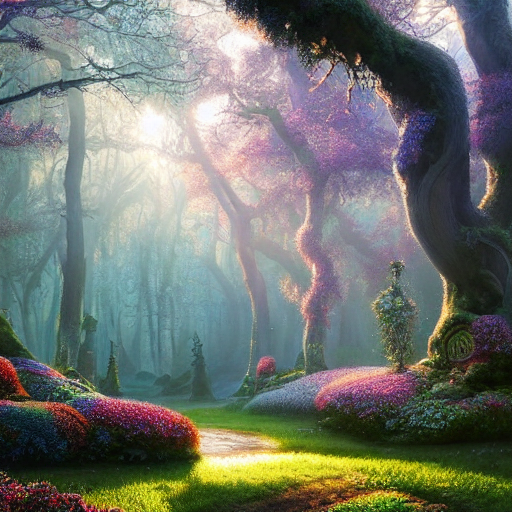


🎉 Task-02 completed without errors.


In [ ]:

!pip install -q diffusers transformers accelerate safetensors pillow

import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import os

print("All libraries installed and imported successfully.")

model_id = "runwayml/stable-diffusion-v1-5"

print("Loading model... Please wait (first time takes ~1-2 minutes).")

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
)

pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

print("Model loaded on device:", pipe.device)

prompt = "A breathtakingly beautiful, highly detailed digital painting of an enchanted forest at dawn, mystical light filtering through ancient trees, iridescent flora, shimmering dew, hyperrealistic, fantasy art, cinematic, volumetric lighting, rich colors, octane render, 8K, intricate, by artists like Artgerm, WLOP, Greg Rutkowski."
negative_prompt = "ugly, deformed, disfigured, blurry, bad anatomy, text, watermark, signature, error, lowres, low quality, worst quality, jpeg artifacts, bad composition, poorly drawn, out of frame, extra limbs, extra fingers, malformed hands, missing limbs, oversaturated, dull colors"

print("Generating a single unique and attractive image...")


image = pipe(prompt=prompt, negative_prompt=negative_prompt, guidance_scale=7.5).images[0]

os.makedirs("outputs", exist_ok=True)
image_path = "outputs/task2_unique_attractive_image.png"
image.save(image_path)

print(f"\nImage generated successfully!")
print(f"📁 Image saved at: {image_path}")
display(image)

print("\n🎉 Task-02 completed without errors.")
